Remarque: plutôt que gros travail de projection, il peut être mieux de faire une table de correspondance (ex vielles regions, nouvelles regions)

Remarque: pour toute for loop ou map, se demander s'il n'y a pas l'équivalent en fonction vectorielle (surtout sur les gros fichiers)

Remarque: pour executer qu'une partie en sublime, selectionner et faire %paste dans le terminal

Remarque: on peut faire un multi index et faire un merge sur un multi index parfois

Remarque: thousands=',', 

Remarque: faire un data frame d'analyse au début puis renommer ceux sur lesquels on travaille et où on a indexé ce qui nous intéresse

Remarque: esayloading quand crawle: enregistrer une fonction qui la première fois lance le crawler, la seconde va chercher le fichier qui a été enregistré de la requête

In [ ]:
test = pd.read_csv()

In [9]:
# coding: utf-8

import numpy as np
import pandas as pd
import pdb
from pandas import Series, DataFrame
import re
import string
import time
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = '~/Documents/MS_BGD_Cours/Tempdata/'
file = 'R201512.csv'
file2 = 'estim-pop-reg-sexe-gca-2015.csv'
file3 = 'rppsmedecins.csv'

In [3]:
oldRegions = str.lower('''Bourgogne
Franche-Comté
Haute-Normandie
Basse-Normandie
Nord-Pas-de-Calais
Picardie
Lorraine
Alsace
Champagne-Ardenne
Aquitaine
Poitou-Charentes
Limousin
Midi-Pyrénées
Languedoc-Roussillon
Rhône-Alpes
Auvergne''').replace('é', 'e').replace('-', ' ').replace('ô', 'o').split('\n')

newRegions = str.lower('''Bourgogne-Franche-Comté
Bourgogne-Franche-Comté
Normandie
Normandie
Nord-Pas-de-Calais-Picardie
Nord-Pas-de-Calais-Picardie
Alsace-Champagne-Ardenne-Lorraine
Alsace-Champagne-Ardenne-Lorraine
Alsace-Champagne-Ardenne-Lorraine
Aquitaine-Limousin-Poitou-Charentes
Aquitaine-Limousin-Poitou-Charentes
Aquitaine-Limousin-Poitou-Charentes
Languedoc-Roussillon-Midi-Pyrénées
Languedoc-Roussillon-Midi-Pyrénées
Auvergne-Rhône-Alpes
Auvergne-Rhône-Alpes''').replace('é', 'e').replace('-', ' ').replace('ô', 'o').split('\n')

In [4]:
######################## Loading extra fees by region and date #################
start = time.time()
try:
    dfInit = pd.read_csv(path+file, sep=';', encoding='iso-8859-1', nrows=100, low_memory=False)
    ################################# encoding = "latin 1" pour importer les accents
    df = dfInit.copy()

    # Select usefull columns, drop others
    useful_cols_R = ['dep_mon', 'l_region', 'sns_date']
    newCols = ['region', 'date', 'dep_hon']
    # Reservoir: useful_cols = ['act_dnb', 'dep_mon', 'exe_spe', 'l_exe_spe', 'region', 'l_region', 'sns_date']
    for col in df.columns:
        if col not in useful_cols_R:
            df = df.drop(col, axis=1)
    df.columns = newCols
    
    
    # operations for cleaning data
    df['region'] = df['region'].str.lower()
    df['dep_hon'] = df['dep_hon'].str.replace(r'(,)', '.')
    df['region'] = df['region'].str.replace('([\d]+-)', '')
    df['dep_hon'] = df['dep_hon'].astype('float')
    
    # Dates handling
    df['date'] = pd.to_datetime(df['date'], format='%Y%m', errors='ignore')
    df.columns = newCols
    df['date'] = df['date'].dt.year
    
    # Dropna
    df = df.dropna()
    
    # Handling new regions
    for i in range(len(oldRegions)):
        old = oldRegions[i]
        new = newRegions[i]
        df = df.replace(old, new)
    
    # Useful presentation
    dfview = df.groupby(['region', 'date'])['dep_hon'].sum()
except:
    print('An error occured while importing/ cleaning data frame: Health Coverage Expenses')
end = time.time()

print("{:.0f} min {:.2f} s".format(((end - start) // 60), ((end - start) % 60)))
print(dfview)

0 min 0.05 s
region                               date
alsace champagne ardenne lorraine    2012   -22.0
aquitaine limousin poitou charentes  2011     0.0
                                     2012     0.0
bourgogne franche comte              2011     0.0
centre                               2012     0.0
guadeloupe                           2012    14.7
ile de france                        2011     0.0
                                     2012    19.0
languedoc roussillon midi pyrenees   2011     0.0
martinique                           2011     0.0
                                     2012     0.0
nord pas de calais picardie          2011     0.0
                                     2012     0.0
normandie                            2011     0.0
                                     2012     0.0
pays de la loire                     2011     0.0
                                     2012     3.0
provence alpes cote d'azur           2012   -34.0
Name: dep_hon, dtype: float64


In [5]:
######################## Loading doctor density by region and specialities /100k inhab. #################
start = time.time()
try:
    dfInitD = pd.read_csv(path+file3, sep=',', encoding='iso-8859-1', skiprows=4, nrows=22, error_bad_lines=False)
    dfD = dfInitD.copy()

    dfD = dfD.drop(0, axis=0).drop(1, axis=0).drop(2, axis=0).drop(3, axis=0)
    dfD = dfD.reset_index().drop('index', axis=1)

    dfD.rename(columns = {'SPECIALITE':'region'}, inplace = True)
    
    dfD['region'] = dfD['region'].str.lower()
    regexCleaning = ['(ô)', '(é)', '(î)', '(-)']
    newValues = ['o', 'e', 'i', ' ']
    for i in range(len(regexCleaning)):
        dfD['region'] = dfD['region'].str.replace(regexCleaning[i], newValues[i])

    dfD = pd.melt(dfD, id_vars=['region'], var_name='spe')
    dfD.rename(columns = {'value':'densite_med'}, inplace = True)  
    dfD['densite_med'].astype('float')
except:
    print('An error occured while importing/ cleaning data frame: Doctor density')
end = time.time()

print("{:.0f} min {:.2f} s".format(((end - start) // 60), ((end - start) % 60)))

0 min 0.02 s


In [6]:
dfD.head()

,region,spe,densite_med
0,alsace champagne ardenne lorraine,Ensemble des spécialités d'exercice,319.9
1,aquitaine limousin poitou charentes,Ensemble des spécialités d'exercice,334.4
2,auvergne rhone alpes,Ensemble des spécialités d'exercice,336.9
3,bourgogne franche comte,Ensemble des spécialités d'exercice,294.6
4,bretagne,Ensemble des spécialités d'exercice,315.7


In [7]:
df1 = pd.merge(df, dfD, how='inner')
dfview1 = df1.groupby(['region', 'spe']).agg({'densite_med': np.mean, 'dep_hon' : np.sum})
dfview1.head()

dep_hon  \
region                            spe                                            
alsace champagne ardenne lorraine Anatomie et cytologie pathologiques    -22.0   
                                  Anesthésie-réanimation                 -22.0   
                                  Biologie médicale                      -22.0   
                                  Cardiologie et maladies vasculaires    -22.0   
                                  Chirurgie générale                     -22.0   

                                                                       densite_med  
region                            spe                                               
alsace champagne ardenne lorraine Anatomie et cytologie pathologiques          2.0  
                                  Anesthésie-réanimation                      16.8  
                                  Biologie médicale                            4.0  
                                  Cardiologie et maladies vasculaires         10.5  
                                  Chirurgie générale                           6.0

ValueError: Input data must be DataFrame or Series

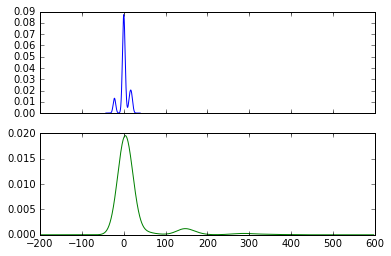

In [42]:
dfview1.plot(kind='density', table=DataFrame, subplots=True)

In [214]:
#dfview1.plot(df1, 'dep_hon', 'densite_med')
for key, grp in dfview1:
    plt.plot(grp['dep_hon'], label=key)
    grp['region'] = pd.rolling_mean(grp['dep_hon'], window=5)    
    plt.plot(grp['region'], label='rolling ({k})'.format(k=key))
plt.legend(loc='best')    
plt.show()

ValueError: too many values to unpack (expected 2)

In [164]:
######################## Loading population by region and age range #################
start = time.time()
try:
    dfInitPop = pd.read_csv(path+file2, sep=';', encoding='iso-8859-1', nrows=1000)
    dfPop = dfInitPop.copy()  
    
    # Operations on columns
    cols_to_delete = [name for name in dfPop.columns]
    for col in dfPop.columns[6:]:
        dfPop = dfPop.drop(col, axis=1)
    
    # Operation on rows
    cols_pop = ['region'] + [re.findall(r'\s(\d+)', name)[0] for name in dfPop.ix[3][1:5]] + ['75']
    dfPop = dfPop.drop(3, axis=0).drop(2, axis=0).drop(1, axis=0).drop(0, axis=0).drop(24, axis=0).drop(25, axis=0).drop(26, axis=0)
    dfPop.columns = cols_pop
    
    # Operations continues
    dfPop['region'] = dfPop['region'].str.lower()
    regexCleaning = ['(ô)', '(é)', '(î)', '(-)']
    newValues = ['o', 'e', 'i', ' ']
    for i in range(len(regexCleaning)):
        dfPop['region'] = dfPop['region'].str.replace(regexCleaning[i], newValues[i])
    dfPop.reset_index().drop('index', axis=1)
    dfPop = pd.melt(dfPop, id_vars=['region'], var_name='agelim')
    dfPop.rename(columns = {'value':'agecount'}, inplace = True)
except:
    print('An error occured while importing/ cleaning data frame: Population Age QCuts')
end = time.time()

print("{:.0f} min {:.2f} s".format(((end - start) // 60), ((end - start) % 60)))
dfPop.head(5)

0.17715787887573242


,region,agelim,agecount
0,alsace champagne ardenne lorraine,19,1 314 940
1,aquitaine limousin poitou charentes,19,1 310 200
2,auvergne rhone alpes,19,1 946 672
3,bourgogne franche comte,19,658 303
4,bretagne,19,791 945


In [172]:
#set(dfD['spe'].values)

In [171]:
print(dfD.size)

2376
